In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv("housing_data.csv")

Data

In [2]:
train_set=data
test_set=data

Details about training data

Shape

In [3]:
train_set.shape

(21613, 21)

datatype

In [4]:
train_set.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Data sample

In [5]:
train_set.head

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1

Describe

In [6]:
train_set.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

Details about test data

shape

In [7]:
test_set.shape

(21613, 21)

Data Sample

In [8]:
test_set.head

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1

Describe

In [9]:
test_set.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

Data Cleaning

Removing null values from train dataset

In [10]:
train_set.isnull().sum().sort_values(ascending=False)

sqft_above       2
date             0
price            0
bedrooms         0
id               0
bathrooms        0
sqft_living      0
floors           0
sqft_lot         0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
test_set.isnull().sum().sort_values(ascending=False)

sqft_above       2
date             0
price            0
bedrooms         0
id               0
bathrooms        0
sqft_living      0
floors           0
sqft_lot         0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Handling missing values

In [12]:
train_set['sqft_above'].fillna(train_set['sqft_above'].mean(), inplace=True)

Removing Rows from data that have invalid value

In [13]:
train_set.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
train_set.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
train_set["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [16]:
duplicate=train_set.duplicated()
print(duplicate.sum())
train_set[duplicate]

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Data visualisation

Text(0, 0.5, 'Frequency')

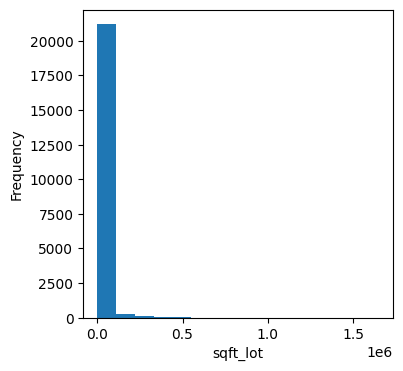

In [17]:
plt.figure(figsize=(4,4))
plt.hist(train_set['sqft_lot'],bins=15)
plt.xlabel('sqft_lot')
plt.ylabel('Frequency')

Text(0, 0.5, 'price')

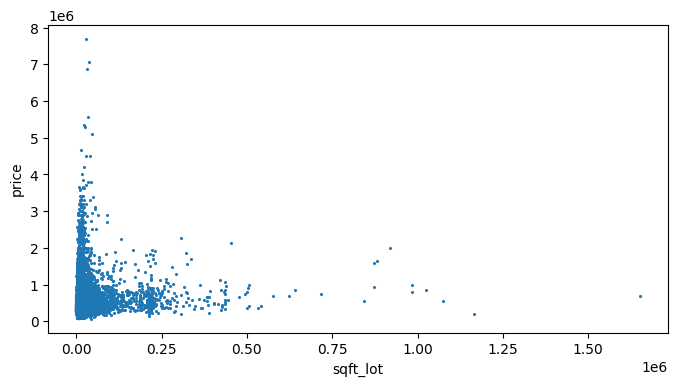

In [18]:
plt.figure(figsize=(8,4))
plt.scatter(x=train_set['sqft_lot'],y=train_set['price'],s=1.5)
plt.xlabel('sqft_lot')
plt.ylabel('price')

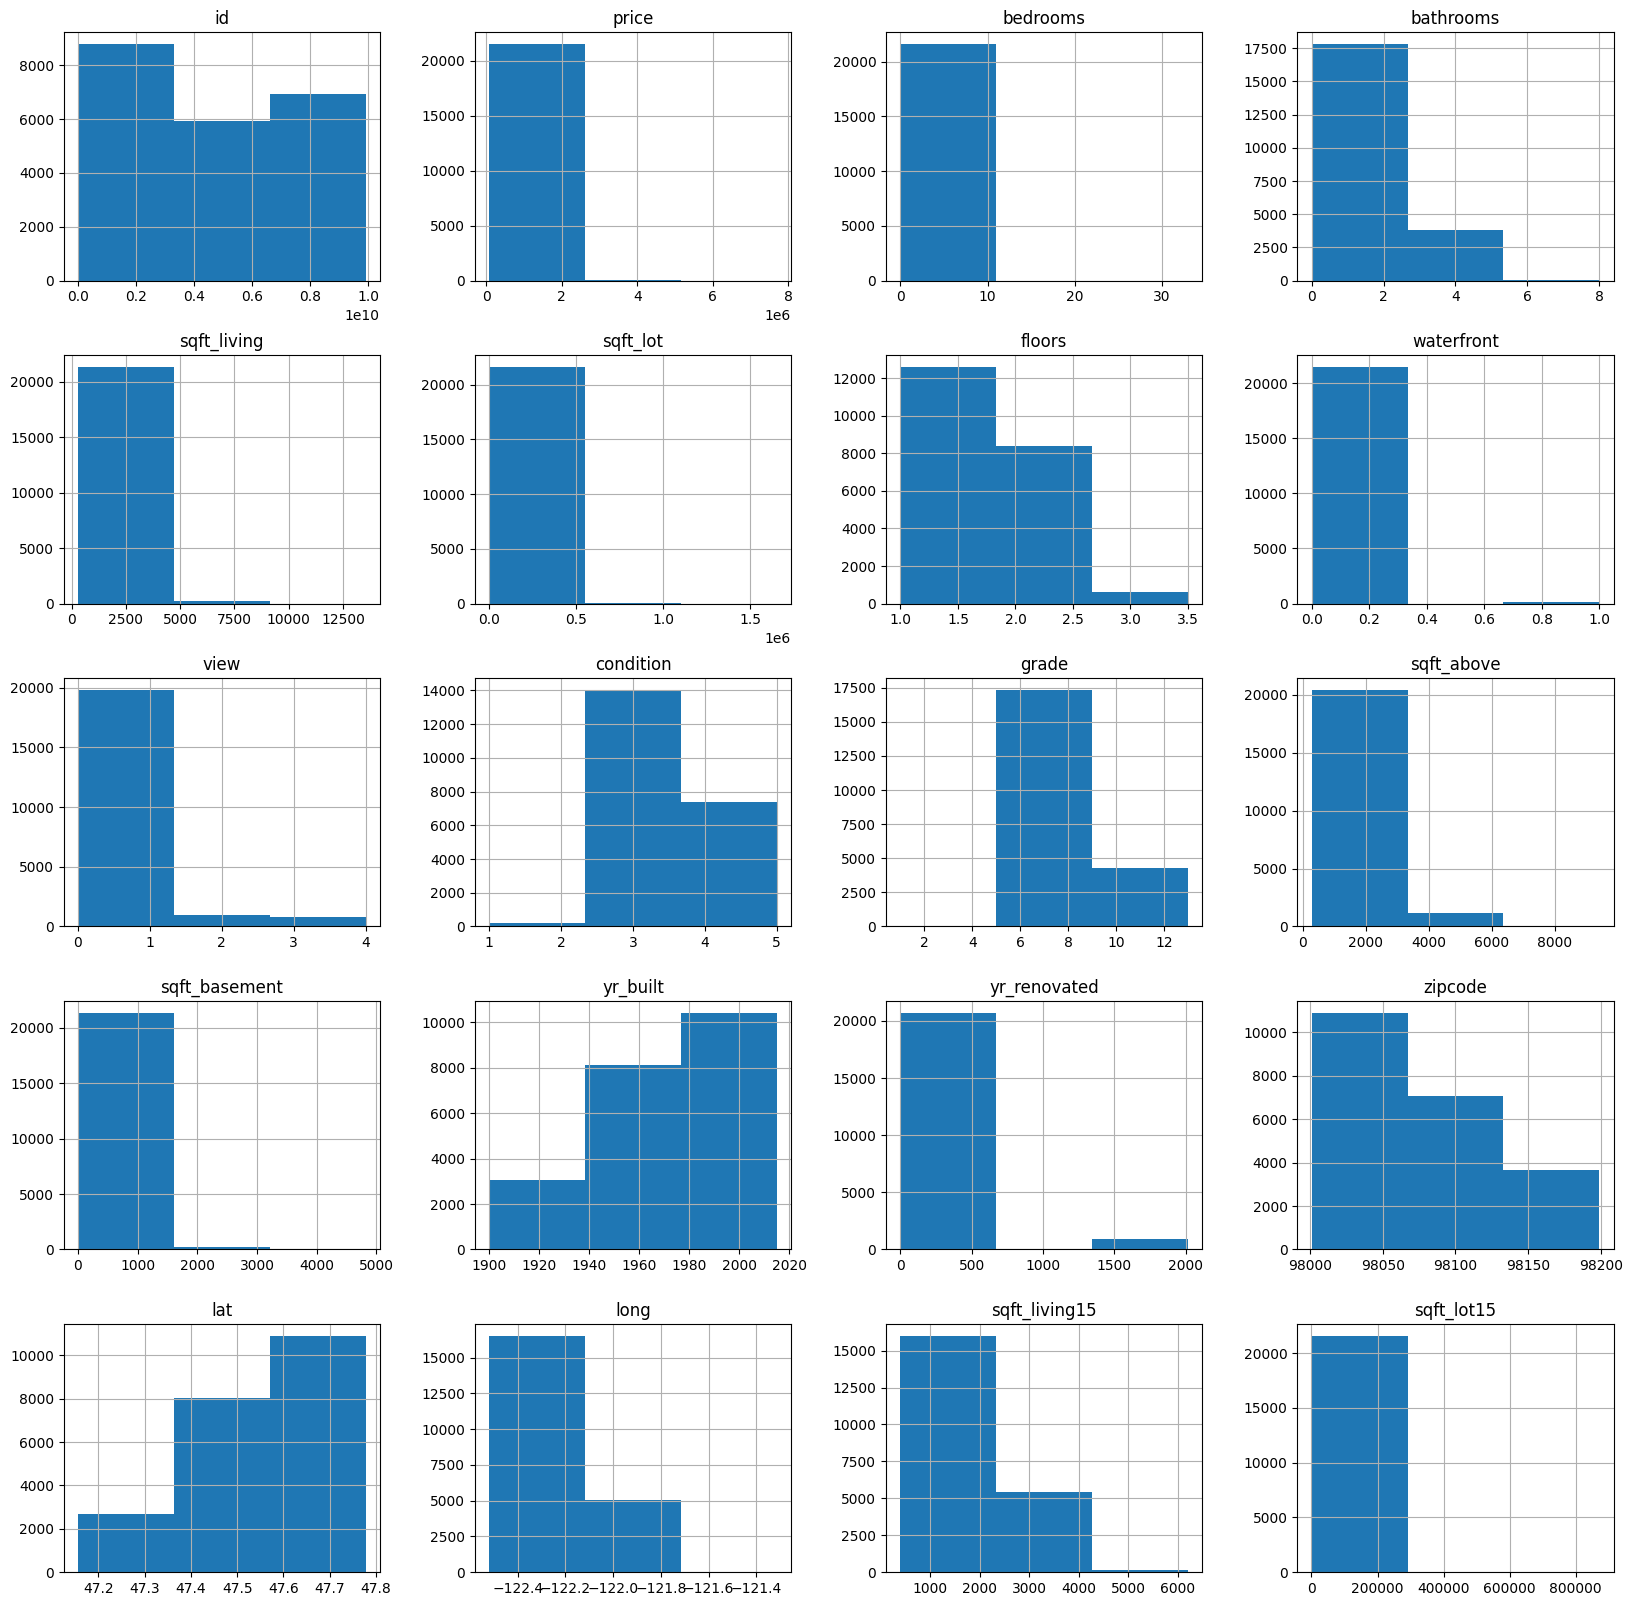

In [19]:
train_set.hist(bins=3,figsize=(20,20))
plt.show()

<Axes: xlabel='price', ylabel='Density'>

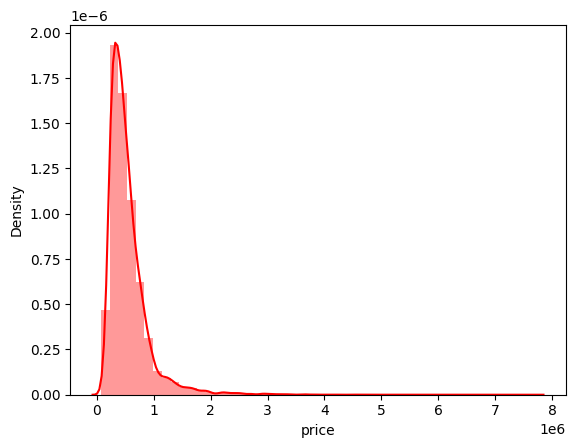

In [20]:
sns.distplot(train_set['price'], color='r')

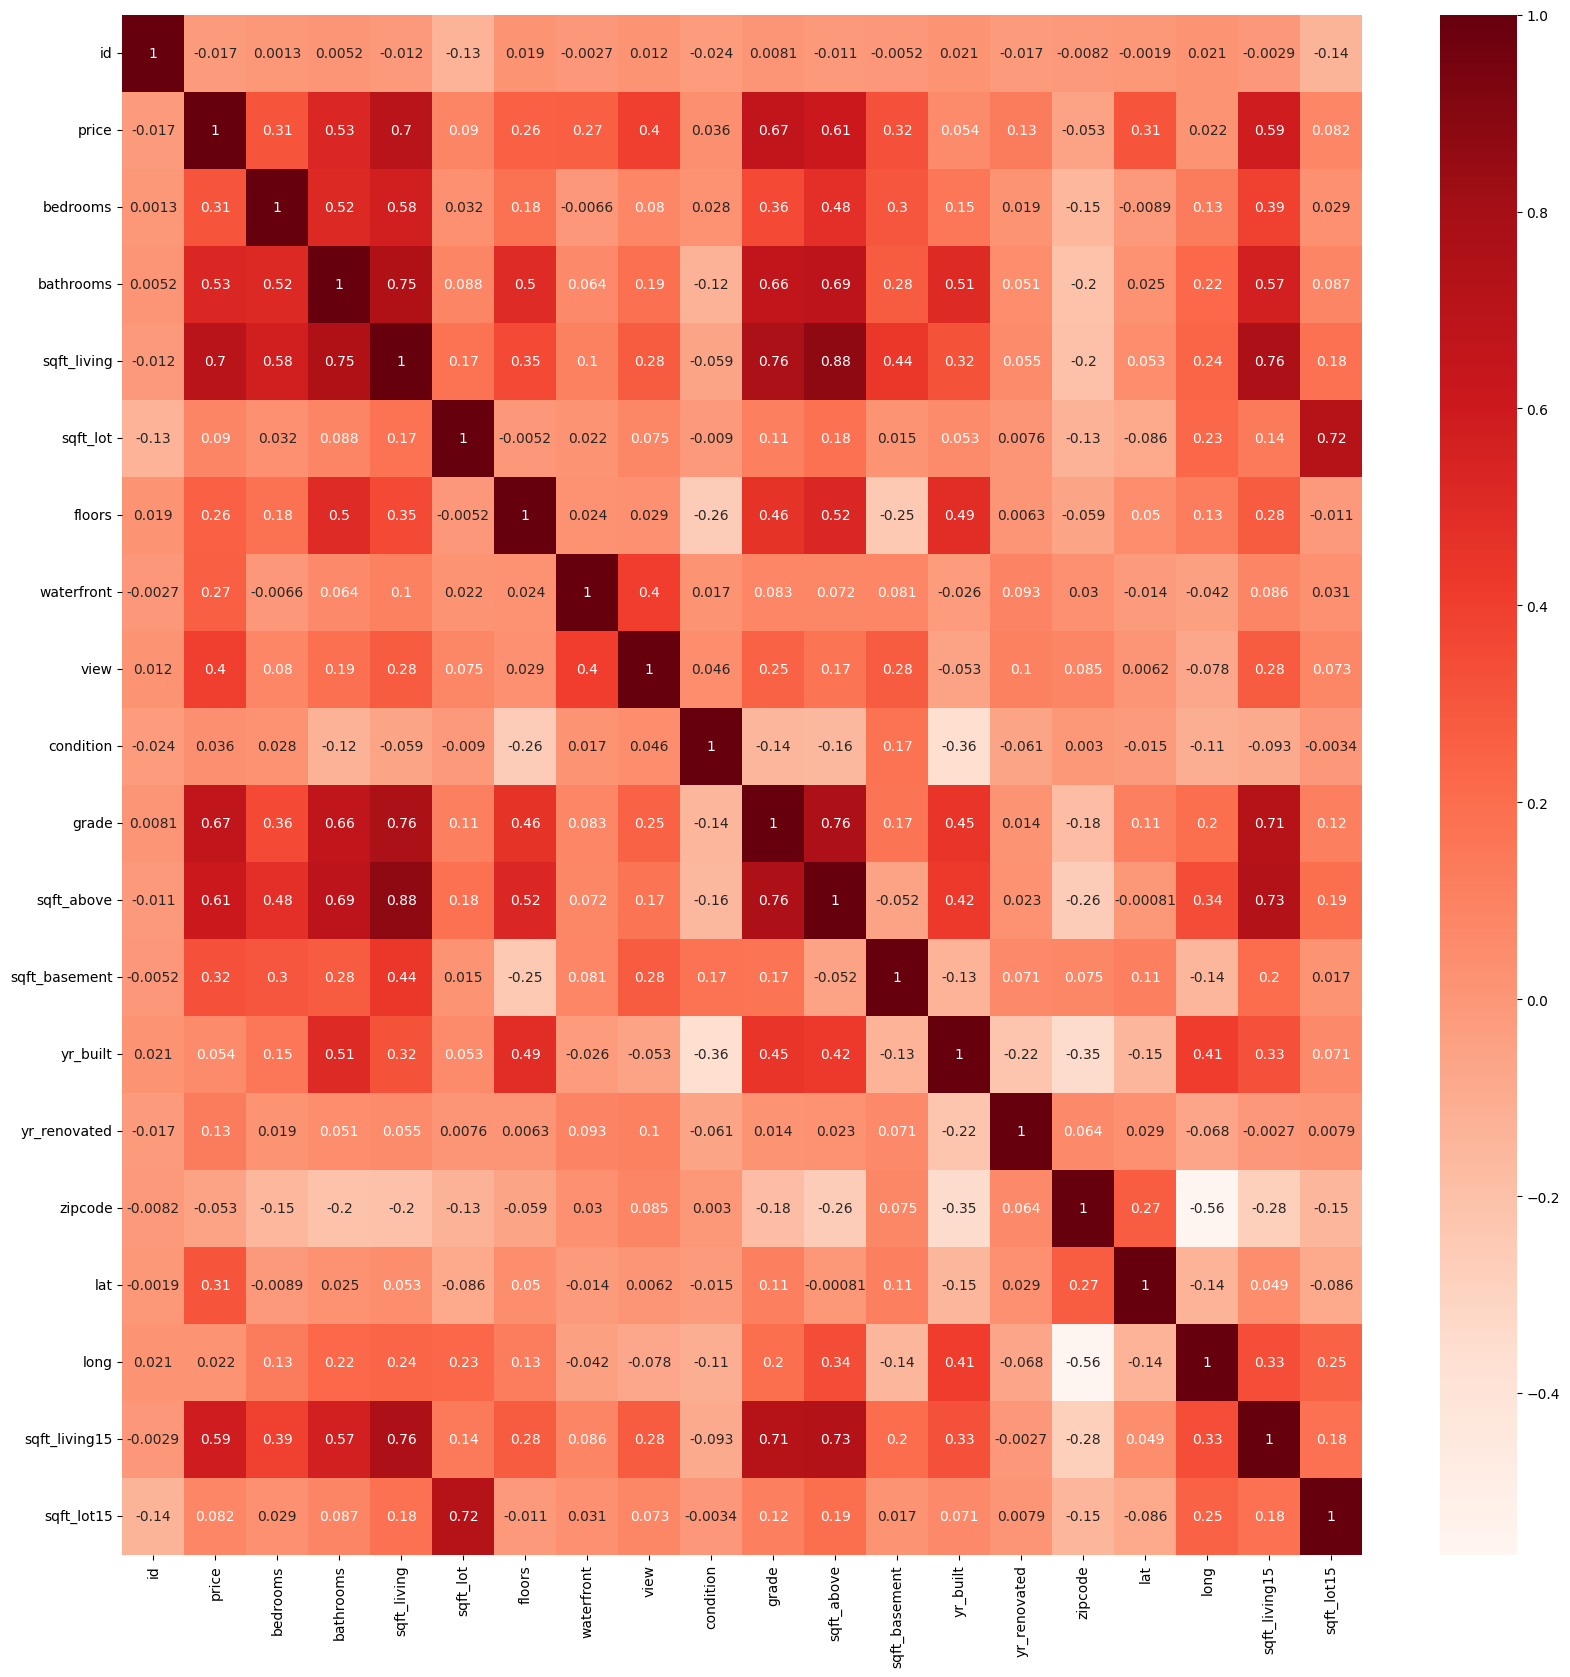

In [21]:
train_set=train_set.drop(["date"],axis=1)
corrmat =train_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_set[top_corr_features].corr(),annot=True,cmap="Reds")


In [22]:
correlation_matrix = train_set.corr()
print(correlation_matrix["price"].sort_values(ascending=False))


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605565
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [23]:
#X=train_set.drop(["id","view","condition","waterfront","floors","sqft_living","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"],axis=1)
X = train_set[["sqft_living", "bedrooms", "bathrooms","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
Y=train_set["price"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state = 40,test_size=0.3)

Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
scores = cross_val_score(reg, X, Y, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.51992448 0.52041742 0.50954198 0.51714016 0.5004237 ]


Linear regression

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(X_train,Y_train)
print("The train set score:",reg.score(X_train,Y_train))
print("The Test set score:",reg.score(X_test,Y_test))

The train set score: 0.5177861702087996
The Test set score: 0.5166383311865759


Mean Square Error

In [26]:
mse3 = np.mean((Y_test - reg.predict(X_test)) ** 2)
print(mse3)

62139113836.314026


In [27]:
mse4 = np.mean((Y_train - reg.predict(X_train)) ** 2)
print(mse4)

66275881496.31615


Predicted values

In [28]:
Y_predictions=reg.predict(X_test)

print("Predict output:",Y_predictions)
print(Y_predictions.shape)
print(Y_test.shape)

Predict output: [1015820.98488953  730772.86897622  492601.34148015 ...  170386.87301897
  732184.85130679  656130.83589061]
(6484,)
(6484,)


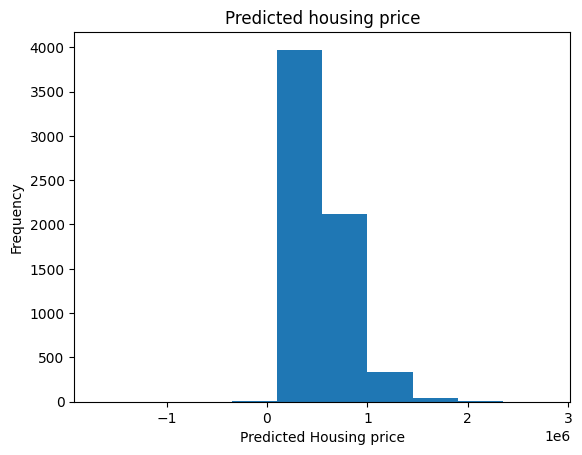

In [29]:

plt.hist(reg.predict(X_test))
plt.title("Predicted housing price")
plt.xlabel(("Predicted Housing price"))
plt.ylabel("Frequency")
plt.show()

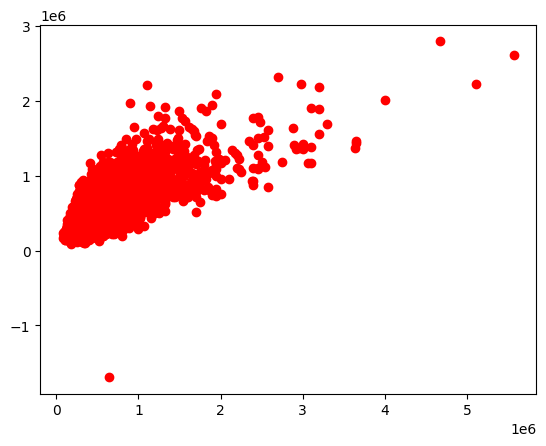

In [30]:
plt.scatter(Y_test,Y_predictions, c='r')

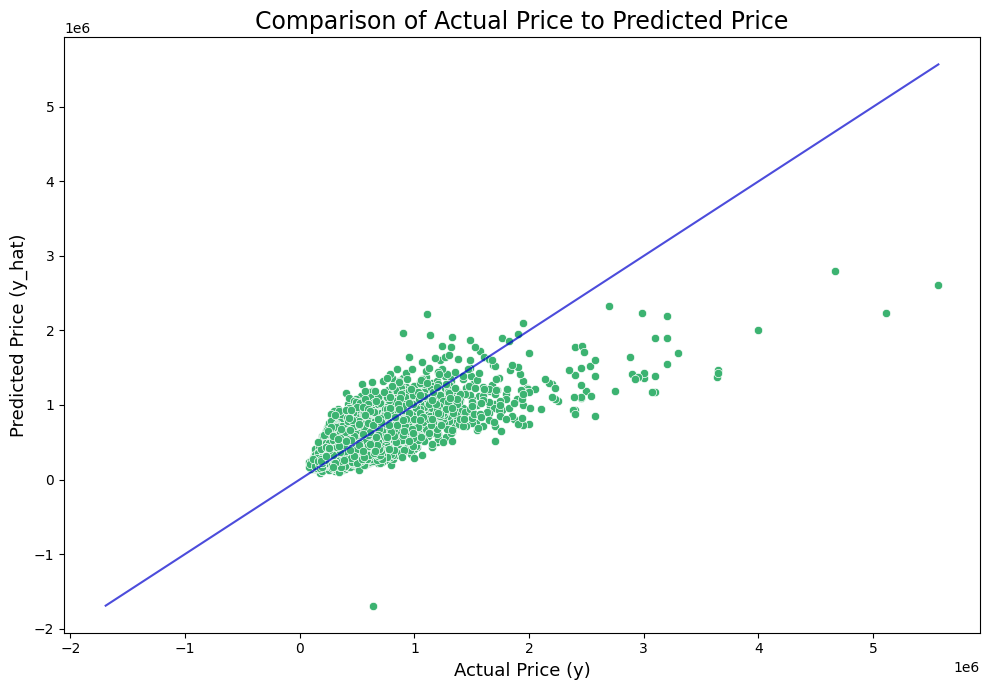

In [31]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = Y_test, y = Y_predictions, color = 'mediumseagreen')
plt.title('Comparison of Actual Price to Predicted Price', fontdict = {'fontsize':17})
maxDist = max(max(Y_predictions), max(Y_test)) # Code from Mahdi's lecture
minDist = min(min(Y_predictions), min(Y_test)) # Code from Mahdi's lecture
plt.plot([minDist, maxDist], [minDist, maxDist], color = 'mediumblue', alpha = 0.7) # Similar to Mahdi's code, but done with Seaborn
plt.xlabel('Actual Price (y)', fontdict= {'fontsize':13})
plt.ylabel('Predicted Price (y_hat)', fontdict= {'fontsize':13})
plt.tight_layout()

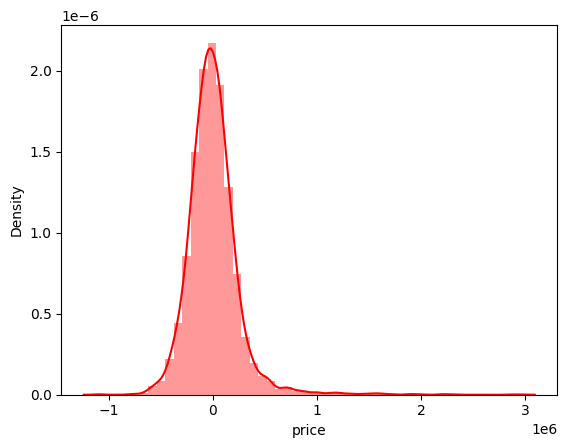

In [32]:
sns.distplot((Y_test-Y_predictions),bins=50, color='r');